__Analyzing Stock Prices with ARIMA Model__

*Oscar Padilla*

# Introduction
The `python` code below was mainly developed by Professor Slater and explained during live session 8 of the DS 7333 Quantifying the World. The goal of this case study is to analyze stock prices as time series using ARIMA.

The assignment consists of,

* Picking a stock: the stock chosen for the analysis was NYSE: **B**, Barnes Group, Inc.

* Getting 4 years worth of data: 2015-2018

* Estimating the parameters $p, d, q$

* Doing a grid search for parameters

* Explaining final decision on parameters

# Background

The main concepts utilized throughout the case study are ARIMA and the DF Test.

## ARIMA [4]
> The Auto Regressive Integrated Moving Average ARIMA model is a statistical models used to analyze and forecasting time series
>
>* AR Autoregression: it uses the dependent relationship between an observation and some number of lagged observations
>
>* I Integrated: by subtracting an observation from an observation at the previous time step in order to make the time series stationary
>
>* MA Moving Average: it uses the dependency between an observation and a residual error from a moving average model applied to lagged observations
>
>Each of these components are explicitly specified in the model as a parameter ARIMA(_p,d,q_) as follows:
>
>* $p$: The number of lag observations included in the model, also called the lag order
>
>* $d$: The number of times that the raw observations are differenced, also called the degree of differencing
>
>* $q$: The size of the moving average window, also called the order of moving average


## Dickey-Fuller Test [6]
>Dickey–Fuller test tests the null hypothesis that a unit root is present in an autoregressive model. The alternative hypothesis is usually stationarity or trend-stationarity.
>A simple AR(1) model is,
>
>$y_{t}=\rho y_{t-1}+u_{t}$
>
>where $y_{t}$ is the variable of interest, $t$ is the time index, $\rho$  is a coefficient, and $u_{t}$ is the error term. A unit root is present if $\rho = 1$. The model would be non-stationary in this case.
>
>The regression model can be written as,
>
>$y_{t}=(\rho -1)y_{t-1}+u_{t}=\delta y_{t-1}+u_{t}$
>
>where $\Delta$ is the first difference operator. This model can be estimated and testing for a unit root is equivalent to testing $\delta = 0$ (where $\delta \equiv \rho - 1$). Since the test is done over the residual term rather than raw data, it is not possible to use standard $t$-distribution to provide critical values. Therefore, this statistic $t$ has a specific distribution simply known as the Dickey–Fuller table.


## Rules [3]
>__Rules for *d*__
__Identifying the order of differencing and the constant:__
>
>1. If the series has positive autocorrelations out to a high number of lags (>9), then it probably needs a higher order of differencing
>
>2. If the lag-1 autocorrelation is zero or negative, or the autocorrelations are all small and patternless, then the
series does __not__ need a higher order of differencing. If the lag-1 autocorrelation is -0.5 or more negative, the series may be overdifferenced. BEWARE OF OVERDIFFERENCING.
>
>3. The optimal order of differencing is often the order of differencing at which the standard deviation is lowest (see rules 6 and 7)
>
>4. A model with no orders of differencing assumes that the original series is stationary (mean-reverting). A model with one order of differencing assumes that the original series has a constant average trend (e.g. a random walk or SES-type model). A model with two orders of total differencing assumes that the original series has a time-varying trend (e.g. a random trend or LES-type model)
>
>5. A model with no orders of differencing normally includes a constant term (which allows for a non-zero mean
value). A model with two orders of total differencing normally does not include a constant term. In a model
with one order of total differencing, a constant term should be included if the series has a non-zero average trend
>
>__Rules for *p, q*__
__Identifying the numbers of AR and MA terms:__
>
>6. If the partial autocorrelation function (PACF) of the differenced series displays a sharp cutoff and/or the lag-1
autocorrelation is positive--i.e., if the series appears slightly "underdifferenced"--then consider adding one or
more AR terms to the model. The lag beyond which the PACF cuts off is the indicated number of AR terms
>
>7. If the autocorrelation function (ACF) of the differenced series displays a sharp cutoff and/or the lag-1
autocorrelation is negative--i.e., if the series appears slightly "overdifferenced"--then consider adding an MA term to the model. The lag beyond which the ACF cuts off is the indicated number of MA terms
>
>8. It is possible for an AR term and an MA term to cancel each other's effects, so if a mixed AR-MA model seems
to fit the data, also try a model with one fewer AR term and one fewer MA term--particularly if the parameter estimates in the original model require more than 10 iterations to converge. BEWARE OF USING MULTIPLE AR
TERMS AND MULTIPLE MA TERMS IN THE SAME MODEL
>
>9. If there is a unit root in the AR part of the model--i.e., if the sum of the AR coefficients is almost exactly 1--you should reduce the number of AR terms by one and increase the order of differencing by one.
>
>10. If there is a unit root in the MA part of the model--i.e., if the sum of the MA coefficients is almost exactly 1--you should reduce the number of MA terms by one and reduce the order of differencing by one
>
>11. If the long-term forecasts* appear erratic or unstable, there may be a unit root in the AR or MA coefficients

# Methods

The approach for this time study is to first decompose the time series to have a better understanding of its components. Then the Dickey-Fuller test will be applied to check whether or not it's a stationary time series.
After differentiating the series -to make it stationary, the autocorrelation and partial autcorrelation will be run.


## Time Series Decomposition

In [1]:
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot as plt
import matplotlib 
%matplotlib inline
import datetime

pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as web
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2018, 12, 31)
price = web.DataReader('B', 'iex', start, end)['close']
price.index = pd.to_datetime(price.index)

Text(0, 0.5, 'Price $')

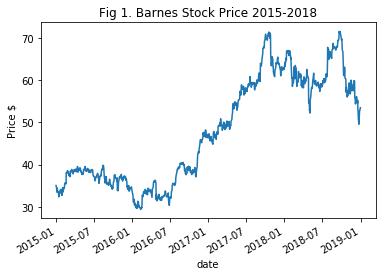

In [2]:
price.plot()
plt.title('Fig 1. Barnes Stock Price 2015-2018')
plt.ylabel('Price $')

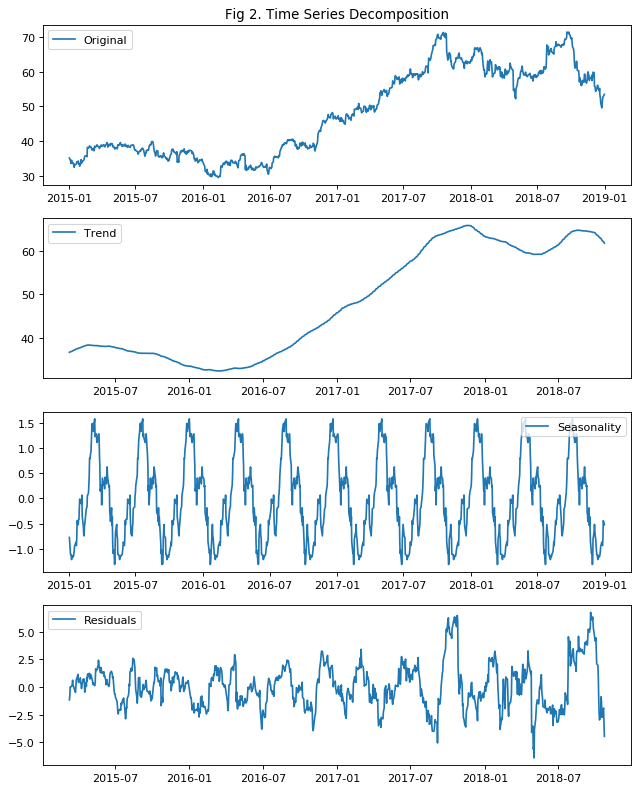

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(price, freq = 90)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(num=None, figsize=(8, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(411)
plt.plot(price, label='Original')
plt.legend(loc='best')
plt.title('Fig 2. Time Series Decomposition')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

## Dickey-Fuller Test

In [4]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color = 'blue',label ='Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Fig 3. Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Fig 3. Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

Test Statistic is -1.2 and the critical value (10%) is -2.6, therefore our original series does not pass the test. The original time series is not stationary.

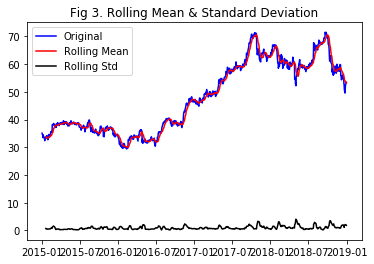

Fig 3. Results of Dickey-Fuller Test:
Test Statistic                   -1.200207
p-value                           0.673507
#Lags Used                        0.000000
Number of Observations Used    1005.000000
Critical Value (1%)              -3.436873
Critical Value (5%)              -2.864420
Critical Value (10%)             -2.568304
dtype: float64


In [5]:
test_stationarity(price)

Test Statistic -31 passes the test (< -3.43) after applying differencing. The `diff` series will be used onwards for further analysis.

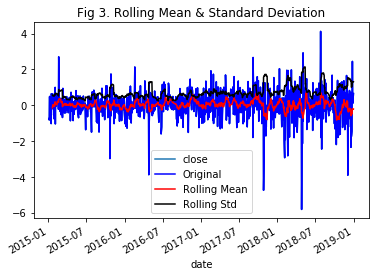

Fig 3. Results of Dickey-Fuller Test:
Test Statistic                  -31.966677
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1004.000000
Critical Value (1%)              -3.436880
Critical Value (5%)              -2.864423
Critical Value (10%)             -2.568305
dtype: float64


In [6]:
diff = price - price.shift()
diff.dropna(inplace = True)
diff.plot()
test_stationarity(diff)

## Autocorrelation Function

Per rule 2 and as shown in Fig 4, the lag-1 autocorrelation is close to zero (sharp drop ~1) and the autocorrelations are all small and patternless, thus the series does __not__ need a higher order of differencing, i.e. $d = 0$.

Text(0.5, 1.0, 'Fig 4. Autocorrelation Function')

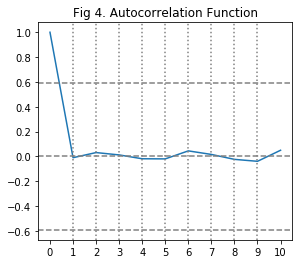

In [7]:
from statsmodels.tsa.stattools import acf, pacf

acf_air_plot = acf(diff, nlags = 10)
#Plot ACF: 
plt.figure(figsize = (10, 4))

plt.subplot(121) 
plt.plot(acf_air_plot)
plt.xticks(np.arange(11))
plt.axhline(y = 0,linestyle='--',color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(acf_air_plot)),linestyle = '--',color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(acf_air_plot)),linestyle = '--',color = 'gray')
for i in range(1,10):
    plt.axvline(x = i,linestyle = ':',color = 'gray')
plt.title('Fig 4. Autocorrelation Function')

## Partial Autcorrelation Function

It also drops ~1, therefore, it's worth to try a (1, 0, 0) model (Intuitive).
_Rule 6. If the partial autocorrelation function (PACF) of the differenced series displays a sharp cutoff and/or the lag-1 autocorrelation is positive--i.e., if the series appears slightly "underdifferenced"--then consider adding one or more AR terms to the model. The lag beyond which the PACF cuts off is the indicated number of AR terms_

Text(0.5, 1.0, 'Fig 5. Partial Autocorrelation Function')

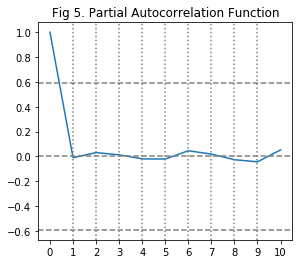

In [8]:
pacf_air_plot = pacf(diff, nlags = 10)
#Plot ACF: 
plt.figure(figsize = (10, 4))

plt.subplot(121) 
plt.plot(pacf_air_plot)
plt.xticks(np.arange(11))
plt.axhline(y = 0,linestyle='--',color='gray')
plt.axhline(y = -1.96/np.sqrt(len(acf_air_plot)),linestyle = '--',color =  'gray')
plt.axhline(y = 1.96/np.sqrt(len(acf_air_plot)),linestyle = '--',color = 'gray')
for i in range(1,10):
    plt.axvline(x = i,linestyle = ':',color = 'gray')
plt.title('Fig 5. Partial Autocorrelation Function')

# Results

The 'optimal' outcome from the grid search (aka 'brute force') will yield the 'Naive Model,' which will be tested using Jan-Feb 2019 actual stock prices as a test data set.

The 'Naive Model' will be compared against an 'Intuitive Model (1, 0, 0).' Both will be compared using the error sum of squares.

## Grid Search

0 0 0
24.52013645672994


/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result eithe

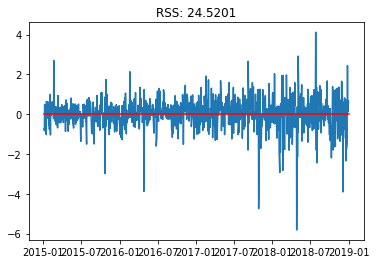

/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


0 0 1
24.51906000613823


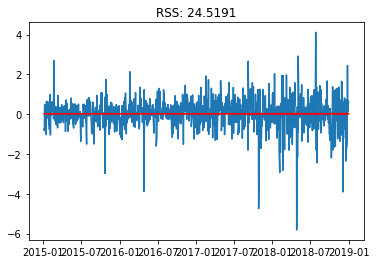

/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


0 0 2
24.506125703309433


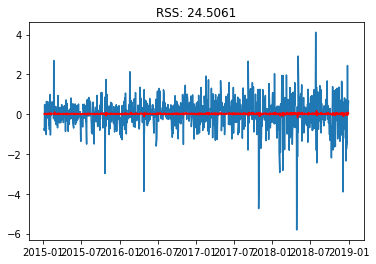

/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


0 1 0


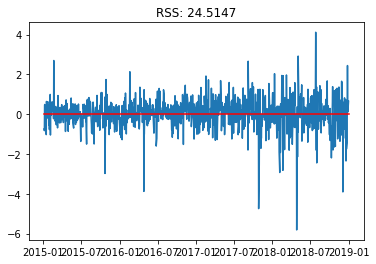

/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


0 1 1


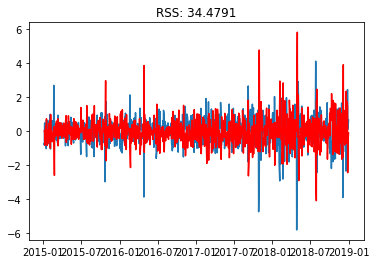

0 1 2


/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


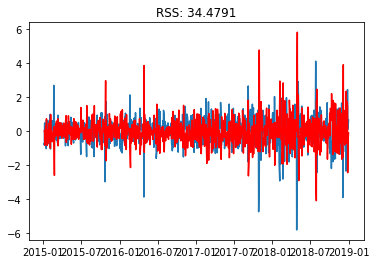

/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


0 2 0
24.501211713213348


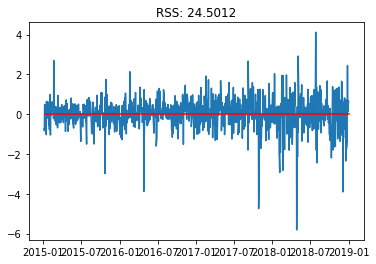

/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


0 2 1


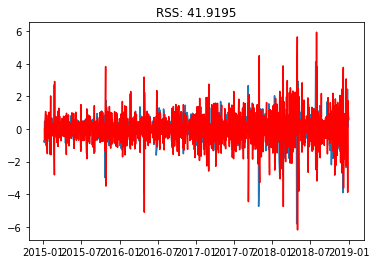

0 2 2


/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


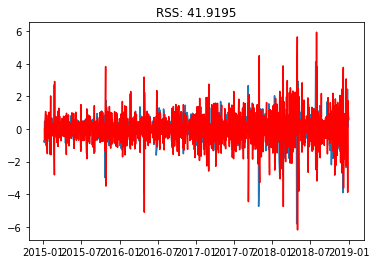

/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


1 0 0


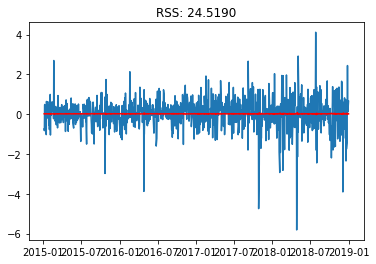

/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


1 0 1


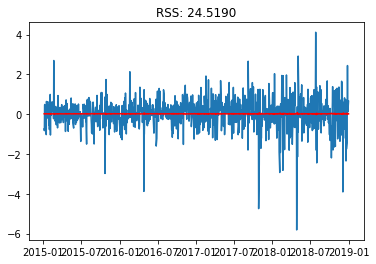

/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


1 0 2


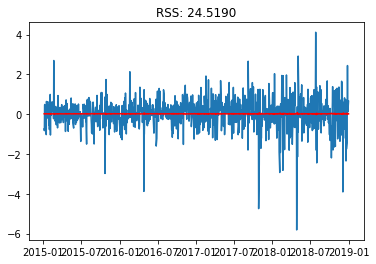

/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


1 1 0


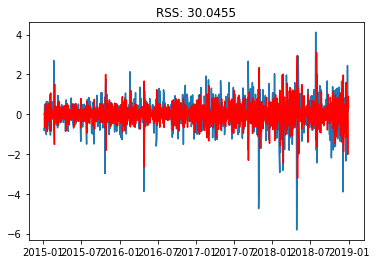

/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


1 1 1


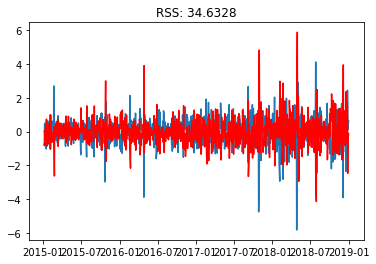

/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


1 1 2


/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


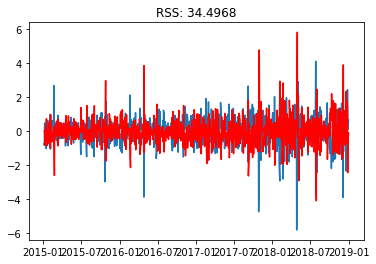

/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


1 2 0


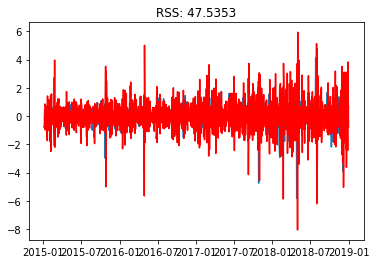

/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


1 2 1


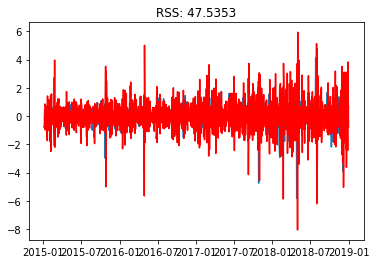

/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


1 2 2


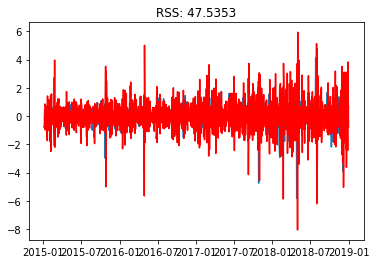

/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


2 0 0


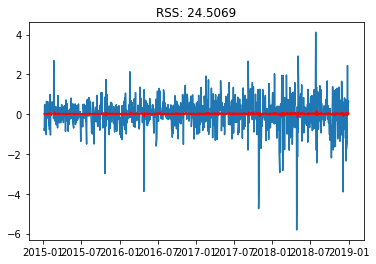

/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


2 0 1


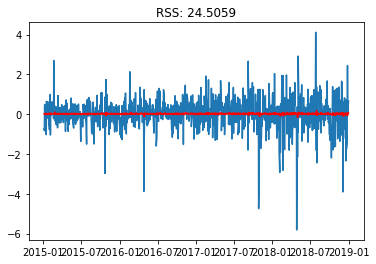

2 0 2


/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


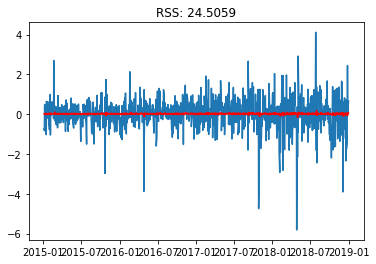

/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


2 1 0


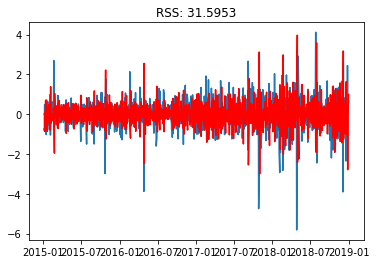

/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


2 1 1


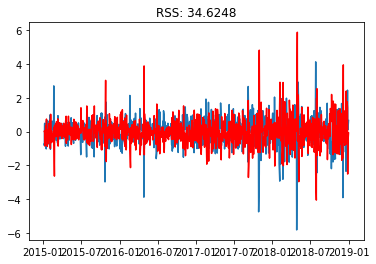

/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


2 1 2


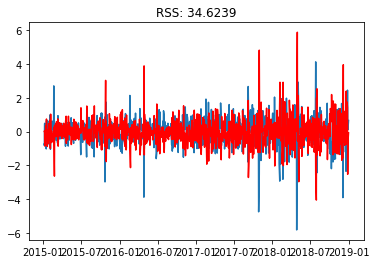

2 2 0


/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


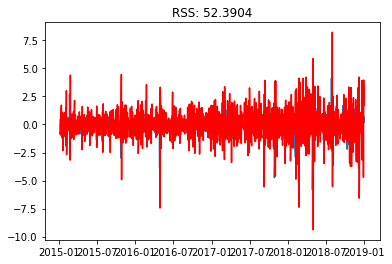

/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


2 2 1


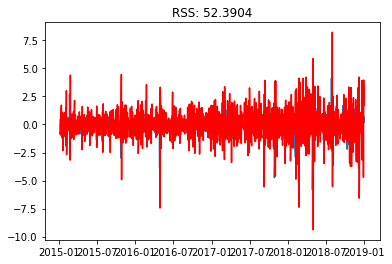

/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


2 2 2


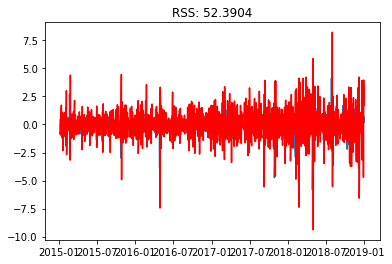

/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


3 0 0


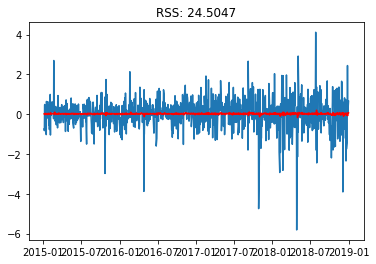

/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


3 0 1


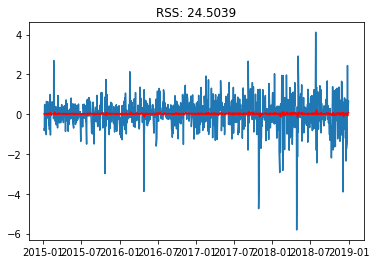

/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


3 0 2
24.324881810785477


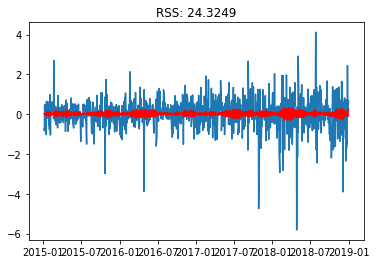

/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


3 1 0


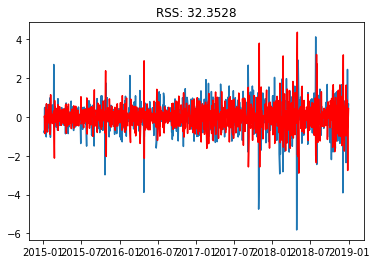

/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


3 1 1


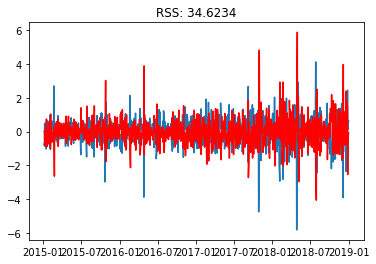

/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


3 1 2


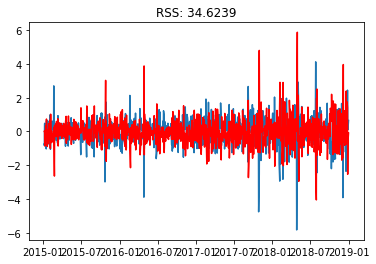

/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


3 2 0


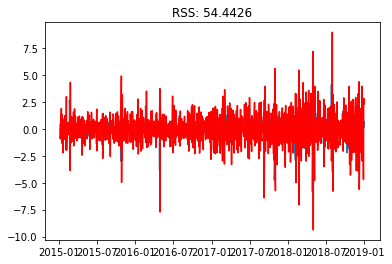

3 2 1


/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


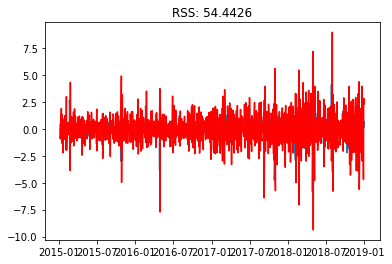

/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


3 2 2


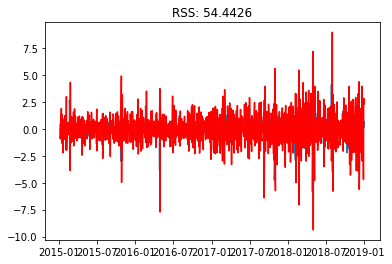

In [10]:
from statsmodels.tsa.arima_model import ARIMA

from pandas import DataFrame as df
df = pd.DataFrame(columns = ['p_value', 'd_value', 'q_value', 'RSS'])

loss_best = 1E16
best_ints = [-1,-1,-1]
for p in range(4):
    for d in range(3):
        for q in range(3):
            model = ARIMA(diff, order=(p, d, q))  
            try:
                results_ARIMA = model.fit(disp=-1)
            except ValueError:
                pass
            except:
                pass
            print(p,d,q)
            plt.plot(diff)
            plt.plot(results_ARIMA.fittedvalues, color='red')
            x=pd.DataFrame(results_ARIMA.fittedvalues)
            x=x.join(diff)
            x['out']=(x.iloc[:,0]-x.iloc[:,1])**2
            loss=np.sqrt(x['out'].sum())
            
            df = df.append({'p_value': p, 
                          'd_value': d, 
                          'q_value': q, 
                          'RSS': loss}, ignore_index = True)
            
            plt.title('RSS: %.4f'% loss)
            if loss < loss_best:
                print(loss)
                loss_best = loss
                best_ints=[p,d,q]
            plt.show()

In [11]:
print(loss_best)
print(best_ints)

24.324881810785477
[3, 0, 2]


In [12]:
df = df.loc[df['d_value'] == 0]
df = df.drop(['d_value'], axis = 1)

    p_value  q_value        RSS
0       0.0      0.0  24.520136
1       0.0      1.0  24.519060
2       0.0      2.0  24.506126
9       1.0      0.0  24.518992
10      1.0      1.0  24.518992
11      1.0      2.0  24.518992
18      2.0      0.0  24.506857
19      2.0      1.0  24.505946
20      2.0      2.0  24.505946
27      3.0      0.0  24.504702
28      3.0      1.0  24.503858
29      3.0      2.0  24.324882


Text(0.5, 1.0, 'Fig 6. RSS as function of p and q')

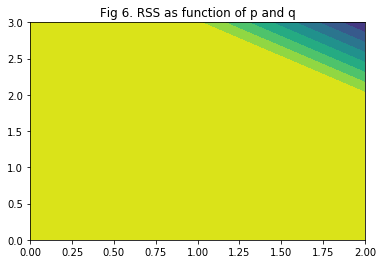

In [13]:
print(df)

df = df.pivot('p_value', 'q_value', 'RSS')
X = df.columns.values
Y = df.index.values
Z = df.values

x,y = np.meshgrid(X, Y)
plt.contourf(x, y, Z)
plt.title('Fig 6. RSS as function of p and q')

## Naive Model (3, 0, 2)

Good normal distribution from residuals. Furthermore, it doesn't seem an overfit from plot above.

/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  close   No. Observations:                 1005
Model:                     ARMA(3, 2)   Log Likelihood               -1159.927
Method:                       css-mle   S.D. of innovations              0.767
Date:                Tue, 05 Mar 2019   AIC                           2333.854
Time:                        20:21:36   BIC                           2368.243
Sample:                             0   HQIC                          2346.921
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0182      0.025      0.733      0.464      -0.030       0.067
ar.L1.close    -0.2226      0.041     -5.446      0.000      -0.303      -0.142
ar.L2.close    -0.9272      0.034    -27.437    

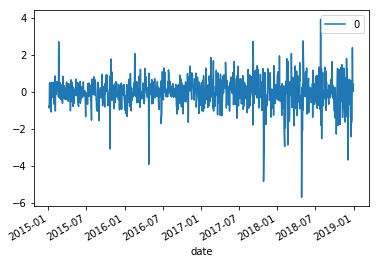

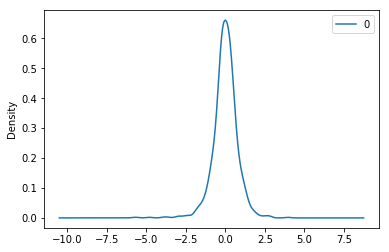

                 0
count  1005.000000
mean      0.000022
std       0.767686
min      -5.684660
25%      -0.344246
50%       0.027428
75%       0.397679
max       3.935895


In [14]:
model = ARIMA(diff, order=(3,0,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

## Test Data - 2019 Stock Prices

In [15]:
start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2019, 2, 28)
test_price = web.DataReader('B', 'iex', start, end)['close']
test_price.index = pd.to_datetime(test_price.index)
test_length = test_price.size
test_price.tail()

date
2019-02-22    60.69
2019-02-25    59.85
2019-02-26    58.42
2019-02-27    58.61
2019-02-28    58.07
Name: close, dtype: float64

Text(0, 0.5, 'Price $')

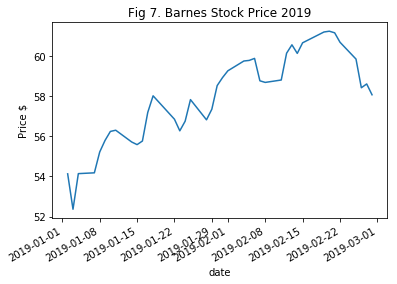

In [16]:
test_price.plot()
plt.title('Fig 7. Barnes Stock Price 2019')
plt.ylabel('Price $')

In [17]:
price.tail()

date
2018-12-24    49.5703
2018-12-26    52.0139
2018-12-27    52.7221
2018-12-28    52.8318
2018-12-31    53.4801
Name: close, dtype: float64

In [18]:
diff.tail()

date
2018-12-24   -1.4463
2018-12-26    2.4436
2018-12-27    0.7082
2018-12-28    0.1097
2018-12-31    0.6483
Name: close, dtype: float64

In [19]:
reinstate = price.shift() + diff
reinstate.dropna(inplace = True)
reinstate.tail()

date
2018-12-24    49.5703
2018-12-26    52.0139
2018-12-27    52.7221
2018-12-28    52.8318
2018-12-31    53.4801
Name: close, dtype: float64

In [20]:
forecast = model_fit.forecast(steps = test_length)[0]

In [21]:
forecast

array([-0.06853912, -0.14338515,  0.1495648 ,  0.13662424, -0.13390076,
       -0.05468735,  0.17819661,  0.04645066, -0.13825672,  0.03057341,
        0.16110279, -0.02890053, -0.10359824,  0.09231446,  0.11342497,
       -0.07470491, -0.04772166,  0.12120668,  0.05409188, -0.08695126,
        0.01070696,  0.11813805,  0.00030852, -0.0707385 ,  0.05689168,
        0.09154069, -0.03620534, -0.03684693,  0.08256721,  0.05352963,
       -0.05074057,  0.00224498,  0.08643436,  0.01607636, -0.04505542,
        0.03579782,  0.07279987, -0.01186242, -0.02539328,  0.05699973])

In [22]:
forecast_ts = pd.Series(forecast, index = test_price.index)

In [23]:
prediction = forecast_ts.append(price.tail(1))

In [24]:
predict = prediction.sort_index(ascending = True)
predict

date
2018-12-31    53.480100
2019-01-02    -0.068539
2019-01-03    -0.143385
2019-01-04     0.149565
2019-01-07     0.136624
2019-01-08    -0.133901
2019-01-09    -0.054687
2019-01-10     0.178197
2019-01-11     0.046451
2019-01-14    -0.138257
2019-01-15     0.030573
2019-01-16     0.161103
2019-01-17    -0.028901
2019-01-18    -0.103598
2019-01-22     0.092314
2019-01-23     0.113425
2019-01-24    -0.074705
2019-01-25    -0.047722
2019-01-28     0.121207
2019-01-29     0.054092
2019-01-30    -0.086951
2019-01-31     0.010707
2019-02-01     0.118138
2019-02-04     0.000309
2019-02-05    -0.070739
2019-02-06     0.056892
2019-02-07     0.091541
2019-02-08    -0.036205
2019-02-11    -0.036847
2019-02-12     0.082567
2019-02-13     0.053530
2019-02-14    -0.050741
2019-02-15     0.002245
2019-02-19     0.086434
2019-02-20     0.016076
2019-02-21    -0.045055
2019-02-22     0.035798
2019-02-25     0.072800
2019-02-26    -0.011862
2019-02-27    -0.025393
2019-02-28     0.057000
dtype: floa

In [25]:
predict_ts = predict.cumsum()
predict_ts

date
2018-12-31    53.480100
2019-01-02    53.411561
2019-01-03    53.268176
2019-01-04    53.417741
2019-01-07    53.554365
2019-01-08    53.420464
2019-01-09    53.365777
2019-01-10    53.543973
2019-01-11    53.590424
2019-01-14    53.452167
2019-01-15    53.482741
2019-01-16    53.643843
2019-01-17    53.614943
2019-01-18    53.511345
2019-01-22    53.603659
2019-01-23    53.717084
2019-01-24    53.642379
2019-01-25    53.594658
2019-01-28    53.715864
2019-01-29    53.769956
2019-01-30    53.683005
2019-01-31    53.693712
2019-02-01    53.811850
2019-02-04    53.812158
2019-02-05    53.741420
2019-02-06    53.798312
2019-02-07    53.889852
2019-02-08    53.853647
2019-02-11    53.816800
2019-02-12    53.899367
2019-02-13    53.952897
2019-02-14    53.902156
2019-02-15    53.904401
2019-02-19    53.990836
2019-02-20    54.006912
2019-02-21    53.961856
2019-02-22    53.997654
2019-02-25    54.070454
2019-02-26    54.058592
2019-02-27    54.033198
2019-02-28    54.090198
dtype: floa

Text(0, 0.5, 'Price $')

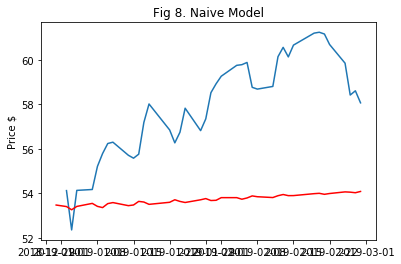

In [26]:
plt.plot(test_price)
plt.plot(predict_ts, color = 'red')
plt.title('Fig 8. Naive Model')
plt.ylabel('Price $')

In [27]:
error_df = pd.DataFrame(predict_ts)
error_df = error_df.join(test_price)
error_df['SE'] = (error_df.iloc[:,0] - error_df.iloc[:,1])**2
error_df

RSS = np.sqrt(error_df['SE'].sum())
print(RSS)

29.307551800527527


## Intuitive Model (1, 0, 0)

Good normal distribution from residuals, almost identical to 'Naive Model' (above).

                              ARMA Model Results                              
Dep. Variable:                  close   No. Observations:                 1005
Model:                     ARMA(1, 0)   Log Likelihood               -1167.825
Method:                       css-mle   S.D. of innovations              0.773
Date:                Tue, 05 Mar 2019   AIC                           2341.650
Time:                        20:21:37   BIC                           2356.389
Sample:                             0   HQIC                          2347.251
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0183      0.024      0.758      0.449      -0.029       0.066
ar.L1.close    -0.0097      0.032     -0.306      0.759      -0.072       0.052
                                    Roots       

/Users/oscarpadilla/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


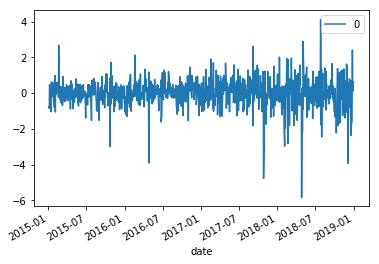

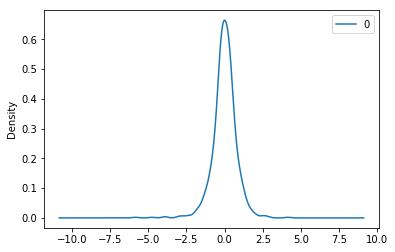

                 0
count  1005.000000
mean     -0.000007
std       0.773813
min      -5.839611
25%      -0.340724
50%       0.030420
75%       0.403313
max       4.124076


In [28]:
model = ARIMA(diff, order=(1,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [29]:
forecast = model_fit.forecast(steps = test_length)[0]

In [30]:
forecast_ts = pd.Series(forecast, index = test_price.index)
prediction = forecast_ts.append(price.tail(1))
predict = prediction.sort_index(ascending = True)
predict_ts = predict.cumsum()
predict_ts

date
2018-12-31    53.480100
2019-01-02    53.492319
2019-01-03    53.510686
2019-01-04    53.528993
2019-01-07    53.547301
2019-01-08    53.565609
2019-01-09    53.583916
2019-01-10    53.602224
2019-01-11    53.620532
2019-01-14    53.638840
2019-01-15    53.657148
2019-01-16    53.675455
2019-01-17    53.693763
2019-01-18    53.712071
2019-01-22    53.730379
2019-01-23    53.748687
2019-01-24    53.766994
2019-01-25    53.785302
2019-01-28    53.803610
2019-01-29    53.821918
2019-01-30    53.840226
2019-01-31    53.858533
2019-02-01    53.876841
2019-02-04    53.895149
2019-02-05    53.913457
2019-02-06    53.931765
2019-02-07    53.950072
2019-02-08    53.968380
2019-02-11    53.986688
2019-02-12    54.004996
2019-02-13    54.023304
2019-02-14    54.041612
2019-02-15    54.059919
2019-02-19    54.078227
2019-02-20    54.096535
2019-02-21    54.114843
2019-02-22    54.133151
2019-02-25    54.151458
2019-02-26    54.169766
2019-02-27    54.188074
2019-02-28    54.206382
dtype: floa

Text(0, 0.5, 'Price $')

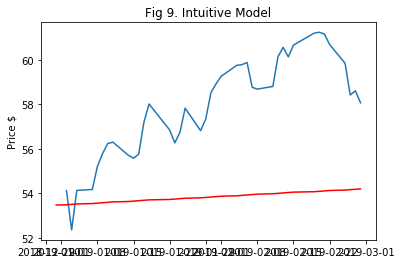

In [31]:
plt.plot(test_price)
plt.plot(predict_ts, color = 'red')
plt.title('Fig 9. Intuitive Model')
plt.ylabel('Price $')

In [32]:
error_df = pd.DataFrame(predict_ts)
error_df = error_df.join(test_price)
error_df['SE'] = (error_df.iloc[:,0] - error_df.iloc[:,1])**2
error_df

RSS = np.sqrt(error_df['SE'].sum())
print(RSS)

28.642543132165677


# Conclusion

From the results above, the 'Intuitive Model (1, 0, 0)' yields slightly better results (i.e. forecast applied to 2019 test data) (RSS = 28.64) than the 'Naive Mode (3, 0, 2) (RSS = 29.31). Preference is for the simpler model that fits the best. Furthermore, the 'Naive Model (3, 0, 2) jeopardizes _Rule 8. [...] Beware of using multiple AR terms __AND__ multimple MA terms in the same model._

# References

1. McKinney, W. (2014), _Python for Data Analysis_, San Francisco, CA: O’Reilly Publishers

2. Aarshay Jain (2016), _A comprehensive beginner’s guide to create a Time Series Forecast (with Codes in Python)_, https://www.analyticsvidhya.com/blog/2016/02/timeseries-forecasting-codes-python/

3. _Introduction to ARIMA: nonseasonal models_, https://people.duke.edu/~rnau/411arim.htm, _Summary of rules for identifying ARIMA models_, https://people.duke.edu/~rnau/arimrule.htm

4. Jason Brownlee (2017), _How to Create an ARIMA Model for Time Series Forecasting in Python_, https://machinelearningmastery.com/arima-for-timeseries-forecasting-with-python/

5. Robert Slater, _Time Series with ARIMAS_

6. https://en.wikipedia.org/wiki/Dickey–Fuller_test